<a href="https://colab.research.google.com/github/danacioDS/AI-ML-Edureka/blob/master/01_Logistic_Regression_SUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing files from Google Drive in Google Colab

# 1. Create file in Google Drive
# 2. Get shareable link of your file
# 3. 3. Get file ID
### Get ID from Javascript 
### ctrl + shift + j

# 4. Install PyDrive
# 5. Import modules
# 6. Authenticate and create the PyDrive client
# 7. Get the file
# 8. Read data
# 9. Check & Finish

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install PyDrive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
## downloaded = drive.CreateFile({'id':"your_file_ID"})   # replace the id with id of file you want to access
## downloaded.GetContentFile('your_file_name.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"12v-pfeV2Ui-w2RN6b7ep2f2F3IFIaQN8"})   # replace the id with id of file you want to access
downloaded.GetContentFile('suv_data.csv')

In [ ]:
# SUV PREDICTIONS 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('suv_data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


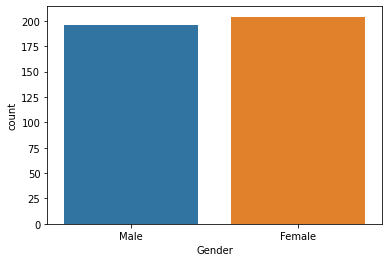

In [ ]:
sns.countplot(x='Gender', data=data)

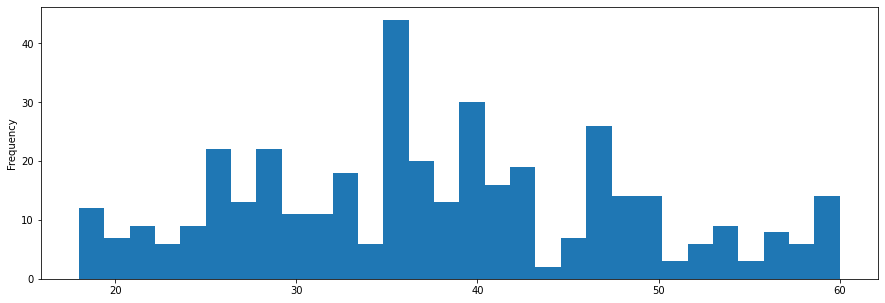

In [ ]:
data['Age'].plot.hist(bins=30, figsize=(15,5))

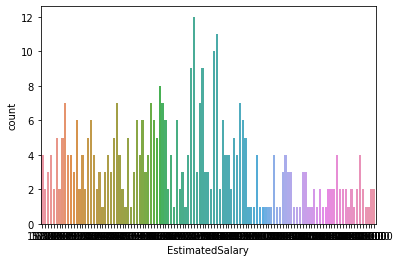

In [ ]:
sns.countplot(x='EstimatedSalary', data=data)

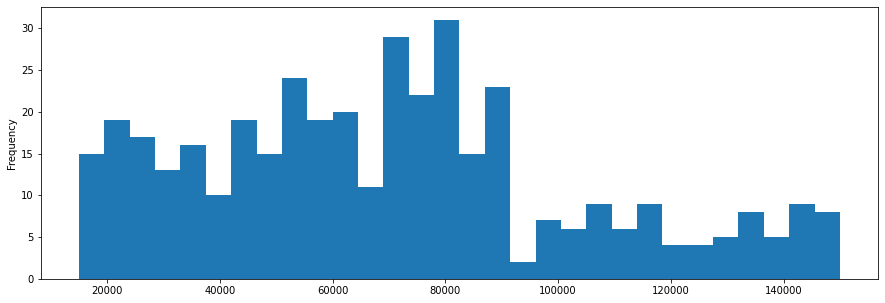

In [ ]:
data['EstimatedSalary'].plot.hist(bins=30, figsize=(15,5))

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

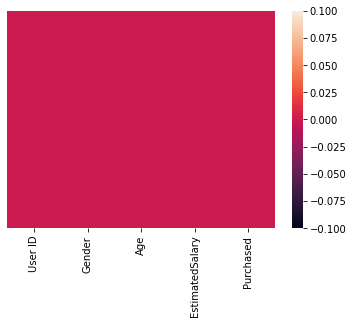

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False)

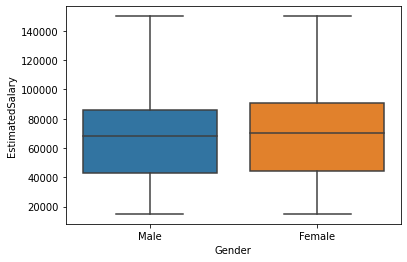

In [ ]:
sns.boxplot(x='Gender', y='EstimatedSalary', data=data)

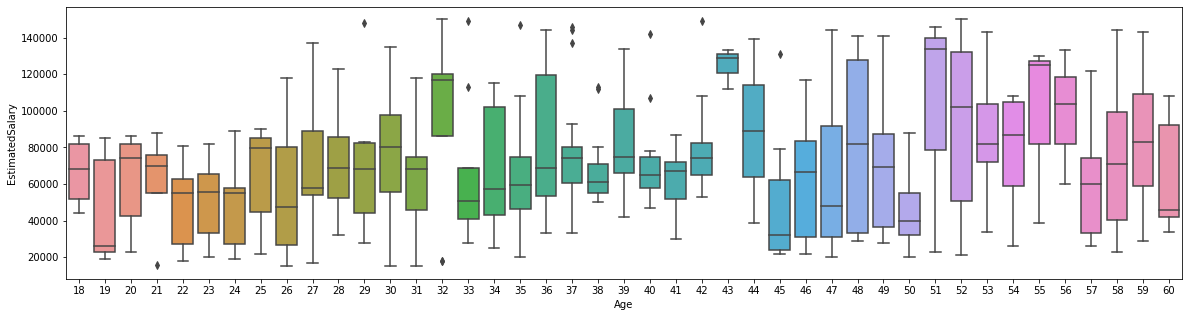

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Age', y='EstimatedSalary', data=data)

In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
# Define variables using a numpy method 
## X = data.iloc[:,[2,3]].values
## y = data.iloc[:,4].values

In [ ]:
# Define variable using pandas method

y = data['Purchased']
X = data[['Age', 'EstimatedSalary']]

In [ ]:
print(X), print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


(None, None)

In [ ]:
# Define Machine Learniing Procedures

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state=None)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)*100

84.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[57,  3],
       [13, 27]])

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# How to extract a conlcusion, 
### for example if a user is 27 years old and has an income of 30000, 
### how much is the probability that this person will buy something